In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [0]:
# Arbitrary choice of amplitudes and frequencies
frq_sin1 = 2
frq_sin2 = 3
frq_cos1 = 0.5
frq_cos2 = 1.6

amp_sin1 = 1
amp_sin2 = 2
amp_cos1 = 3
amp_cos2 = 0.5

# Number of samples:
N = 1000

In [0]:
# Exercise 1: Two sine functions + two cosine functions
x = np.linspace(-(4 * np.pi), 4 * np.pi, N)
y1 = np.sin(x * frq_sin1) * amp_sin1
y2 = np.sin(x * frq_sin2) * amp_sin2
y3 = np.cos(x * frq_cos1) * amp_cos1
y4 = np.cos(x * frq_cos2) * amp_cos2
y = y1 + y2 + y3 + y4

In [0]:
# Exercise 2: Plotting the signal
plt.plot(x,y)
plt.title('Sum of two sines and two cosines')
plt.show()
F = np.fft.fft(y)
F_real = np.real(F)
F_imag = np.imag(F)

plt.subplot(121)
plt.title('real part of FFT')
plt.plot(F_real)
plt.subplot(122)
plt.plot(F_imag)
plt.title('imaginary part of FFT')


In [0]:
# Exercise 3: Adding random noise to the original signal and redoing Exercise 2
noise = np.random.normal(1,0.5,N)
y_noisy = y + noise

plt.plot(x,y_noisy)
plt.title('Noise + sum of two sines and two cosines')
plt.show()
F = np.fft.fft(y_noisy)
F_real = np.real(F)
F_imag = np.imag(F)

plt.subplot(121)
plt.title('real part of FFT')
plt.plot(F_real)
plt.subplot(122)
plt.plot(F_imag)
plt.title('imaginary part of FFT')

In [0]:
# Exercise 4: Standardizing the original and noisy signals to have zero mean and unit variance and plotting them
y_standardized = (y - np.mean(y))/np.var(y)
ynoisy_standardized = (y_noisy - np.mean(y_noisy))/np.var(y_noisy)
plt.plot(x,y_standardized)
plt.title('Standardized signal')
plt.show()
plt.plot(x,ynoisy_standardized)
plt.title('Standardized noisy signal')

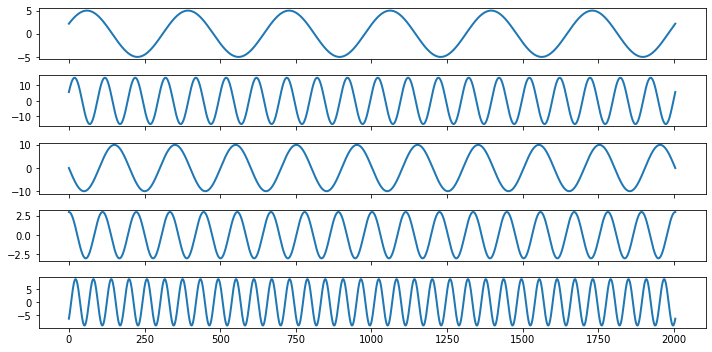

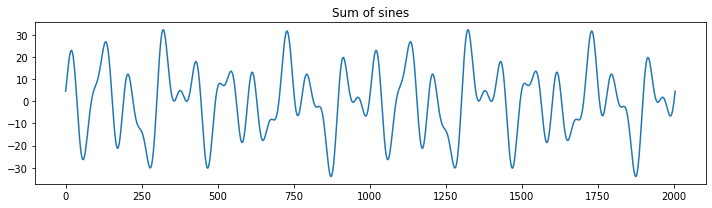

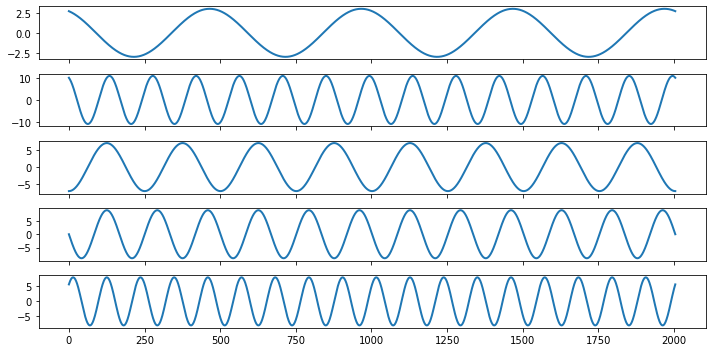

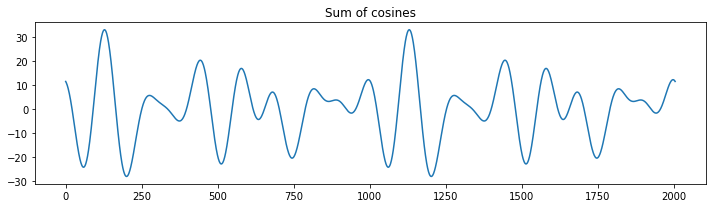

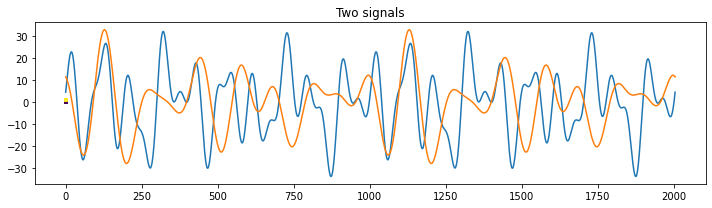

In [40]:
#Exersice 5
from numpy import sin, pi, arange, cos
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

sampling_freq = 1002

freq = [3, 10, 5, 9, 17 ]
amplitude = [5, 15, 10, 3, 9]

freq1 = [2, 7, 4, 6, 9 ]
amplitude1 = [3, 11, 7, 9, 8]

phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


cosine_waves = []
for ii,ff in enumerate(freq1):
    cosine_waves.append(amplitude1[ii] * cos(2*pi*ff*time + phases[ii]))
cosine_waves = np.array(cosine_waves)

f,a = plt.subplots(nrows=5, ncols=1, figsize=(10,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
plt.tight_layout()    

plt.figure(figsize=(10,3))
plt.plot(np.sum(sine_waves, axis=0))
plt.title("Sum of sines")
plt.tight_layout()

f1,a1 = plt.subplots(nrows=5, ncols=1, figsize=(10,5), sharex=True)
for i,x in enumerate(freq1):
    a1[i].plot(cosine_waves[i,:], linewidth=2)
plt.tight_layout()    

plt.figure(figsize=(10,3))
plt.plot(np.sum(cosine_waves, axis=0))
plt.title("Sum of cosines")
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.plot(np.sum(sine_waves, axis=0))
plt.plot(np.sum(cosine_waves, axis=0))
plt.title("Two signals")
plt.tight_layout()

sum_cos = np.sum(cosine_waves, axis=0)
sum_cos = sum_cos.reshape(-1, 1)

X, y = make_blobs(n_samples=sampling_freq, 
                  random_state=10, 
                  centers=3)

k_means = KMeans(n_clusters=2, random_state=40).fit_predict(sum_cos)
plt.scatter(k_means, k_means, c=k_means, s=5)
plt.show()